In [ ]:
!git clone https://github.com/hai-pham-the/QSAR-Class-HUP-.git

Cloning into 'QSAR-Class-HUP-'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 47 (delta 22), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (47/47), 39.23 KiB | 6.54 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [ ]:
!ls QSAR-Class-HUP-/sdf_combination

 001-ibuprofen.sdf   '004-mefenamic acid.sdf'   008-etodolac.sdf     012-sulindac.sdf	  git
 002-naproxen.sdf     005-etoricoxib.sdf        009-fenoprofen.sdf   013-tolmetin.sdf
 003-celecoxib.sdf    006-indomethacin.sdf      010-meloxicam.sdf    014-nabumetone.sdf
 003-diclofenac.sdf   007-aspirin.sdf	        011-piroxicam.sdf    015-ketorolac.sdf


In [ ]:
cd QSAR-Class-HUP-/sdf_combination

/content/QSAR-Class-HUP-/QSAR-Class-HUP-/sdf_combination


In [ ]:
#Install mordred library for descriptor calculation
!pip install mordred

In [ ]:
#Install rdkit package
!pip install rdkit

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdFMCS
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Lipinski import RotatableBondSmarts
from IPython.display import Image
import os
import random
import locale
import warnings
import numpy as np
from google.colab import output, files
output.enable_custom_widget_manager()
print("Dependencies installation complete!")

Dependencies installation complete!


In [ ]:
from rdkit import Chem
import os

def read_sdf_files(folder_path):
    sdf_files = [f for f in os.listdir(folder_path) if f.endswith('.sdf')]

    molecules = []
    for sdf_file in sdf_files:
        file_path = os.path.join(folder_path, sdf_file)
        suppl = Chem.SDMolSupplier(file_path)

        for mol in suppl:
            if mol:
                molecules.append(mol)

    return molecules

# Specify the path to the folder containing SDF files
folder_path = '/content/QSAR-Class-HUP-/sdf_combination'

# Read all SDF files from the folder
molecules = read_sdf_files(folder_path)

# Now, 'molecules' is a list containing RDKit molecule objects


In [ ]:
#If we write molecules it show as a rdkit object
molecules

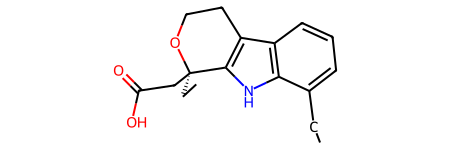

In [ ]:
#If we specified the molecule number inside molecules it show the molecules and all the properties contained in the sdf file
molecules[0]

In [ ]:
ls

 001-ibuprofen.sdf   '004-mefenamic acid.sdf'   008-etodolac.sdf     012-sulindac.sdf     git
 002-naproxen.sdf     005-etoricoxib.sdf        009-fenoprofen.sdf   013-tolmetin.sdf
 003-celecoxib.sdf    006-indomethacin.sdf      010-meloxicam.sdf    014-nabumetone.sdf
 003-diclofenac.sdf   007-aspirin.sdf           011-piroxicam.sdf    015-ketorolac.sdf


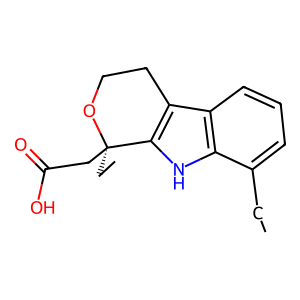

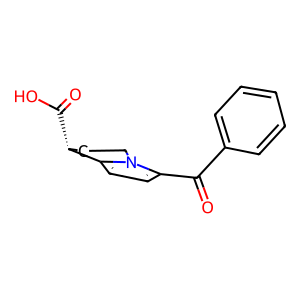

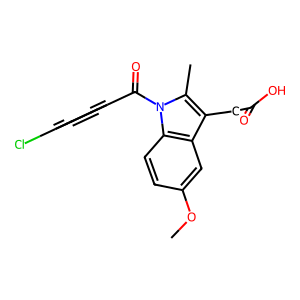

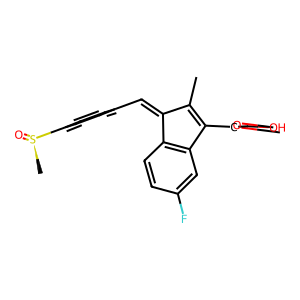

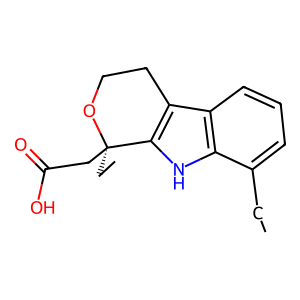

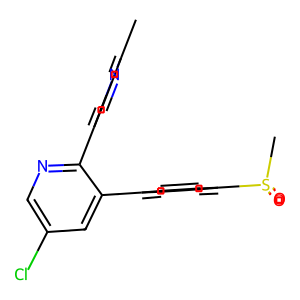

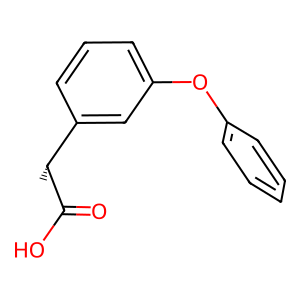

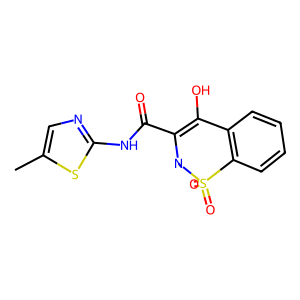

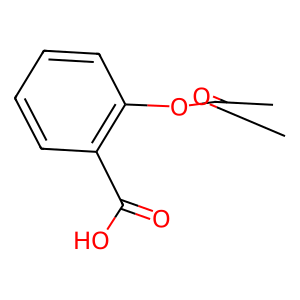

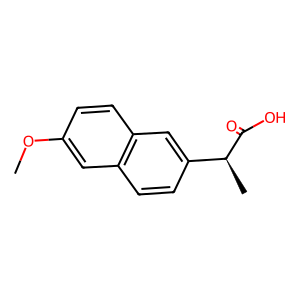

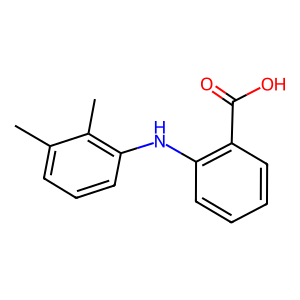

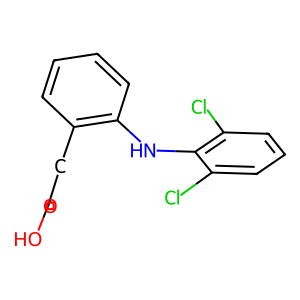

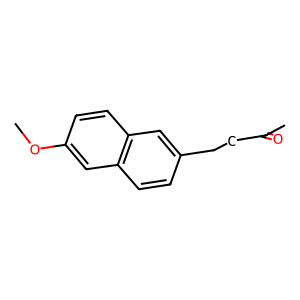

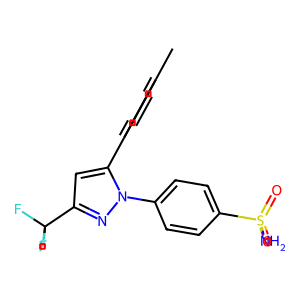

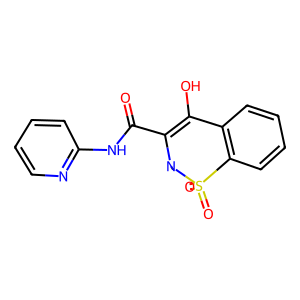

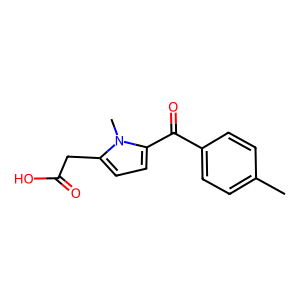

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt

# Ensure you have RDKit's IPython integration enabled (optional but recommended)
from rdkit.Chem import Draw
from IPython.display import display

# Display all molecules
for idx, mol in enumerate(molecules):
    img = Draw.MolToImage(mol, size=(300, 300))
    display(img)


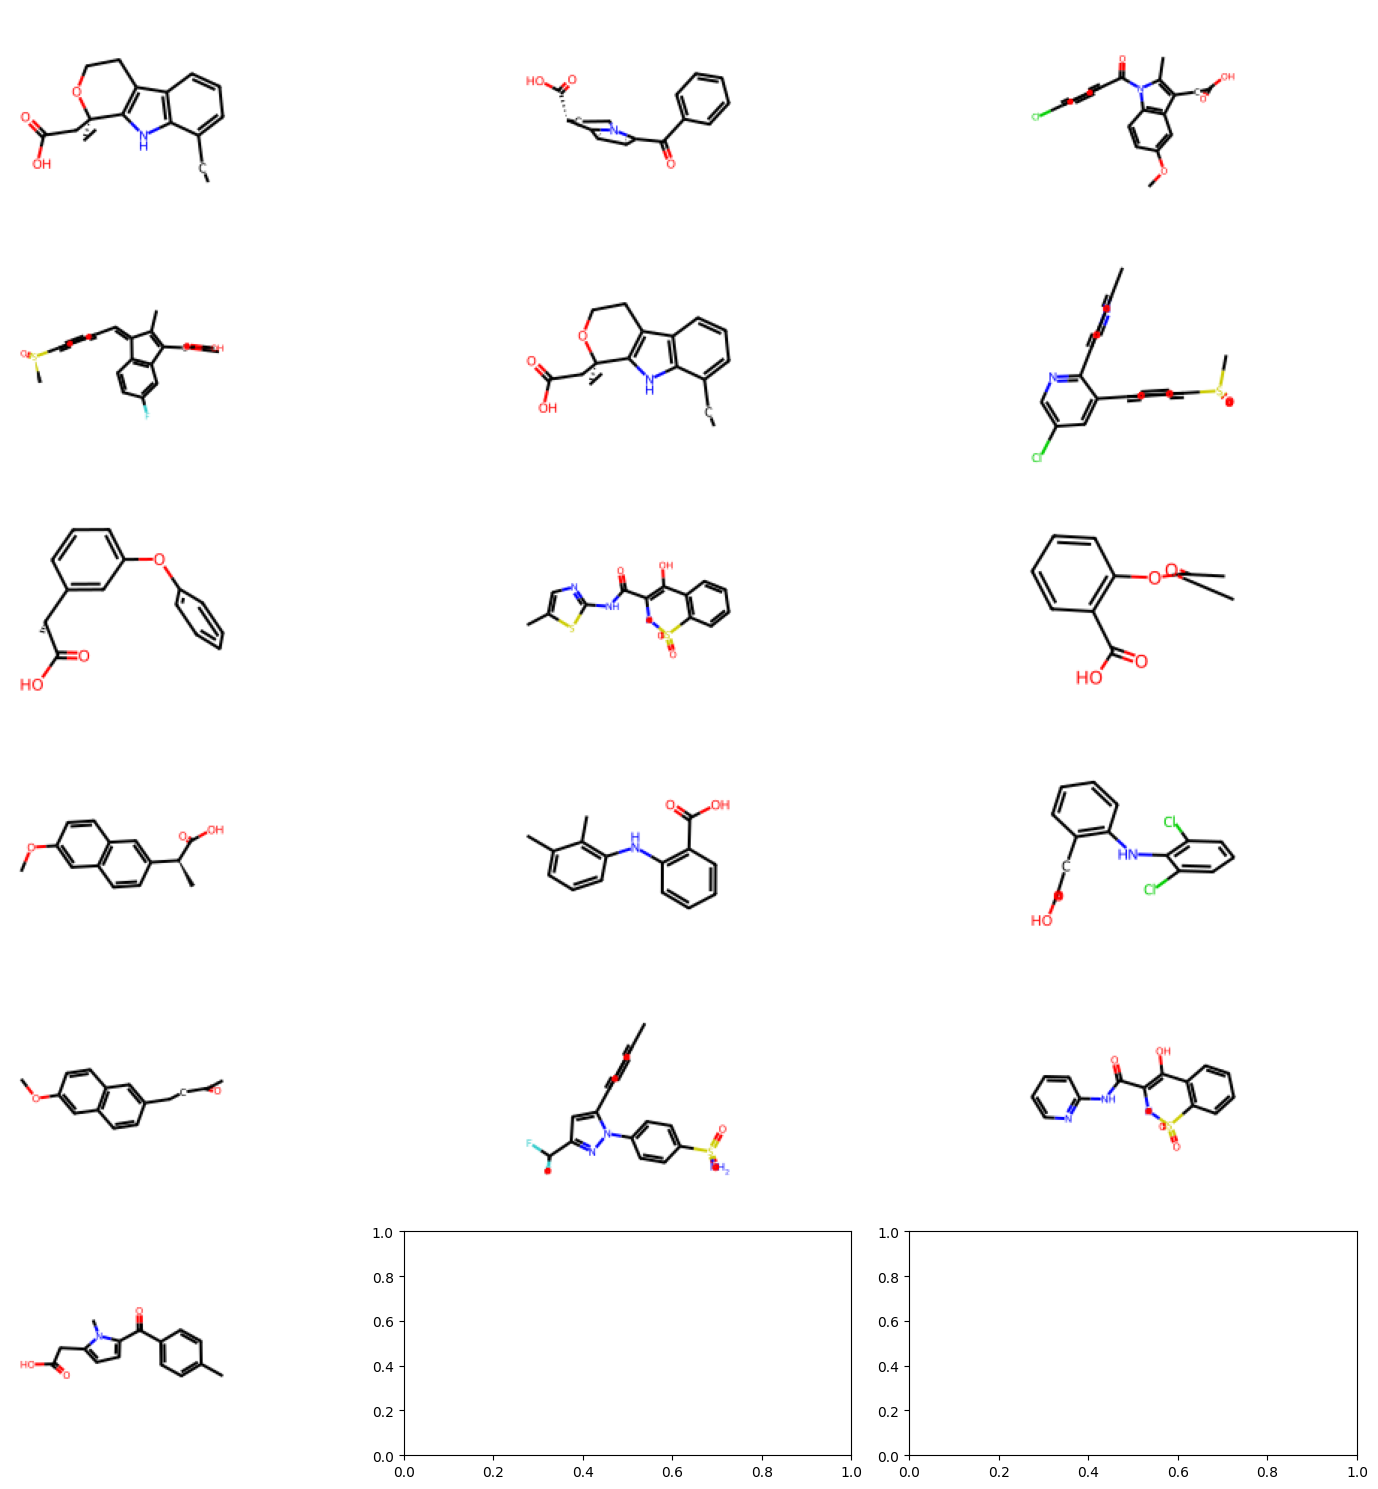

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt

# Ensure you have RDKit's IPython integration enabled (optional but recommended)
from rdkit.Chem import Draw
from IPython.display import display, HTML

# Display molecules in a grid with 3 columns
num_columns = 3
num_rows = len(molecules) // num_columns + (len(molecules) % num_columns > 0)

fig, axs = plt.subplots(num_rows, num_columns, figsize=(15, 15))

for idx, mol in enumerate(molecules):
    row = idx // num_columns
    col = idx % num_columns
    ax = axs[row, col]

    img = Draw.MolToImage(mol, size=(150, 150))
    ax.imshow(img)
    ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
mol = molecules[0]

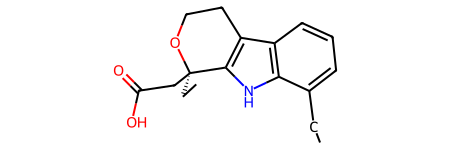

In [ ]:
mol

In [ ]:
! apt-get install pymol

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pymol is already the newest version (2.5.0+dfsg-1build1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [ ]:
!pip install py3Dmol # 3D Molecular Visualizer

In [ ]:
import py3Dmol

def drawit2(m,confId=-1):
    mb = Chem.MolToMolBlock(m,confId=confId)
    p = py3Dmol.view(width=600, height=600)
    p.addModel(mb,'sdf')
    p.setStyle({'stick':{}})
    p.setBackgroundColor('0xeeeeee')
    p.zoomTo()
    return p

def DrawComplex(protein,ligand):
    complex_pl = Chem.MolToPDBBlock(Chem.CombineMols(protein,ligand))
    complex_mol=Chem.CombineMols(receptor,mols[-1])
    view = py3Dmol.view(width=600,height=600)
    view.addModel(complex_pl,'pdb')
    view.addModel(Chem.MolToMolBlock(mols[0]),'sdf')
    chA = {'chain':['H','L','I']}
    chB = {'resn':'UNL'}
    view.setStyle(chA,{'cartoon': {'color':'spectrum'}})
    view.setStyle(chA,{'lines': {}})
    view.addSurface(py3Dmol.VDW,{'opacity':0.8}, chB)
    view.setStyle(chB,{'stick':{}})
    view.zoomTo()
    return view


In [ ]:
drawit2(molecules[0])

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [ ]:
#Show the path for the current folder
pwd

'/content/QSAR-Class-HUP-/QSAR-Class-HUP-/output_sdf'

In [ ]:
#Combining all the sdf files in one sdf file
from rdkit import Chem
from rdkit.Chem import AllChem
import os

def combine_sdf_files(input_folder, output_file):
    # Create an empty SDF writer
    writer = Chem.SDWriter(output_file)

    # Loop over all SDF files in the input folder
    for filename in os.listdir(input_folder):
        if filename.endswith('.sdf'):
            # Load the molecule from the SDF file
            sdf_filepath = os.path.join(input_folder, filename)
            suppl = Chem.SDMolSupplier(sdf_filepath)

            # Loop over all molecules in the current SDF file
            for mol in suppl:
                if mol:

                    # Add explicit hydrogens
                    #mol = Chem.AddHs(mol)

                    # Generate 3D coordinates
                    #AllChem.EmbedMolecule(mol)

                    # Write the molecule to the combined SDF file
                    writer.write(mol)

    # Close the SDF writer
    writer.close()

# Specify the input folder containing SDF files
input_folder = '/content/QSAR-Class-HUP-/sdf_combination'

# Specify the output file for the combined SDF
output_file = '/content/QSAR-Class-HUP-/QSAR-Class-HUP-/output_sdf/combined.sdf'


# Combine SDF files into one
combine_sdf_files(input_folder, output_file)



In [ ]:
ls

combined.sdf  git


In [ ]:
pwd

'/content/QSAR-Class-HUP-/QSAR-Class-HUP-/output_sdf'

In [ ]:
from rdkit import Chem
from mordred import Calculator, descriptors

In [ ]:
#define the variable to calculate the descriptors, 3D descriptors are ignore
calc=Calculator(descriptors,ignore_3D=False)

In [ ]:
#Checking how many descriptors we have
print(f'There will be calculated {len(calc.descriptors)} descriptors')

There will be calculated 1826 descriptors


In [ ]:
import pandas as pd
from rdkit.Chem import PandasTools

In [ ]:
cd /content/QSAR-Class-HUP-/QSAR-Class-HUP-/output_sdf

/content/QSAR-Class-HUP-/QSAR-Class-HUP-/output_sdf


In [ ]:
ls

combined.sdf  git


In [ ]:
# Load molecules from SDF file
suppl = Chem.SDMolSupplier('combined.sdf')

In [ ]:
#Show how many molecules were loaded
print(f'Number of molecules: {len(suppl)}')

Number of molecules: 16


In [ ]:
#Proceed with the calculation
df = calc.pandas(suppl)

100%|██████████| 16/16 [00:10<00:00,  1.54it/s]


In [ ]:
#To visualize our table with the calculations
df.head()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,16.258866,13.992746,1,0,27.060767,2.570531,5.010168,27.060767,1.288608,3.990142,...,10.236633,69.916593,287.152144,6.836956,825,38,114.0,140.0,7.229167,4.736111
1,14.934771,13.199105,1,0,24.595653,2.502834,4.806204,24.595653,1.294508,3.894021,...,9.908127,68.619732,255.089543,7.971548,693,29,102.0,123.0,6.027778,4.166667
2,19.355751,16.150871,1,0,31.637704,2.544121,4.910966,31.637704,1.265508,4.148908,...,10.212625,74.558706,357.076786,8.709190,1424,42,132.0,158.0,9.361111,5.527778
3,19.505581,15.766800,1,0,31.420837,2.521624,4.851284,31.420837,1.256833,4.148581,...,10.164505,74.456122,356.088244,8.478292,1517,40,132.0,156.0,9.361111,5.416667
4,16.258866,13.992746,1,0,27.060767,2.570531,5.010168,27.060767,1.288608,3.990142,...,10.236633,69.916593,287.152144,6.836956,825,38,114.0,140.0,7.229167,4.736111


In [ ]:
#Download the data to your computer
df.to_csv('pubchem.csv')
from google.colab import files
files.download("pubchem.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>